Лабораторна робота№1.1 студента ФІТ 4-4 Колесника Максима Максимовича

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify-2023.csv to spotify-2023.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('spotify-2023.csv', encoding='cp1251')

In [ ]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
print(data.head())  # Перші декілька рядків даних
print(data.info())  # Загальна інформація про дані

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts      streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703.0           

In [ ]:
data.replace("-", np.nan, inplace=True)

1. Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань.

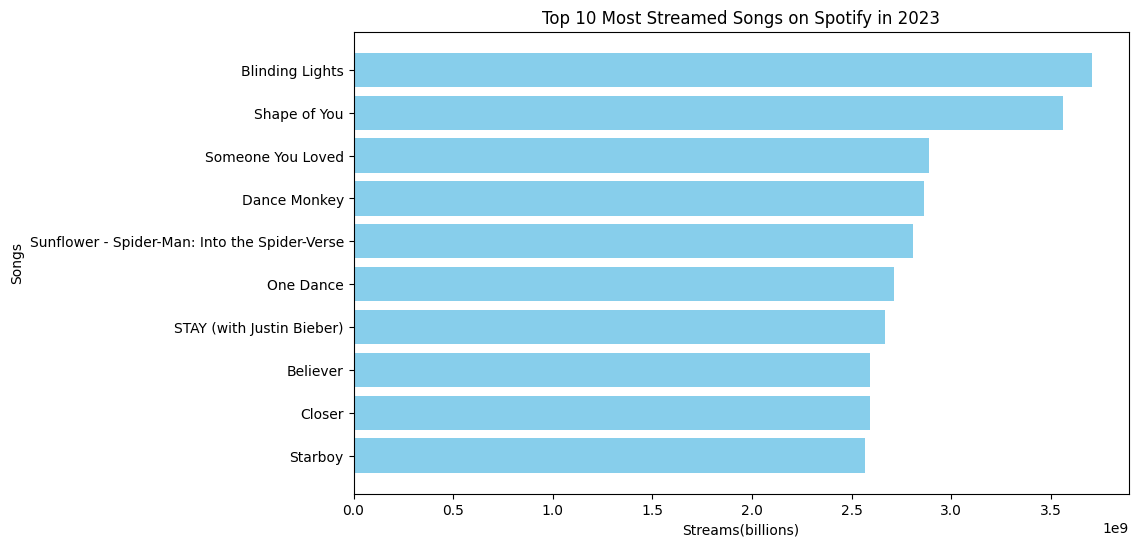

In [ ]:
top_10_songs = data.sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('Streams(billions)')
plt.ylabel('Songs')
plt.title('Top 10 Most Streamed Songs on Spotify in 2023')
plt.gca().invert_yaxis()
plt.show()

1. Побудувати кругову діаграму для тих самих даних.

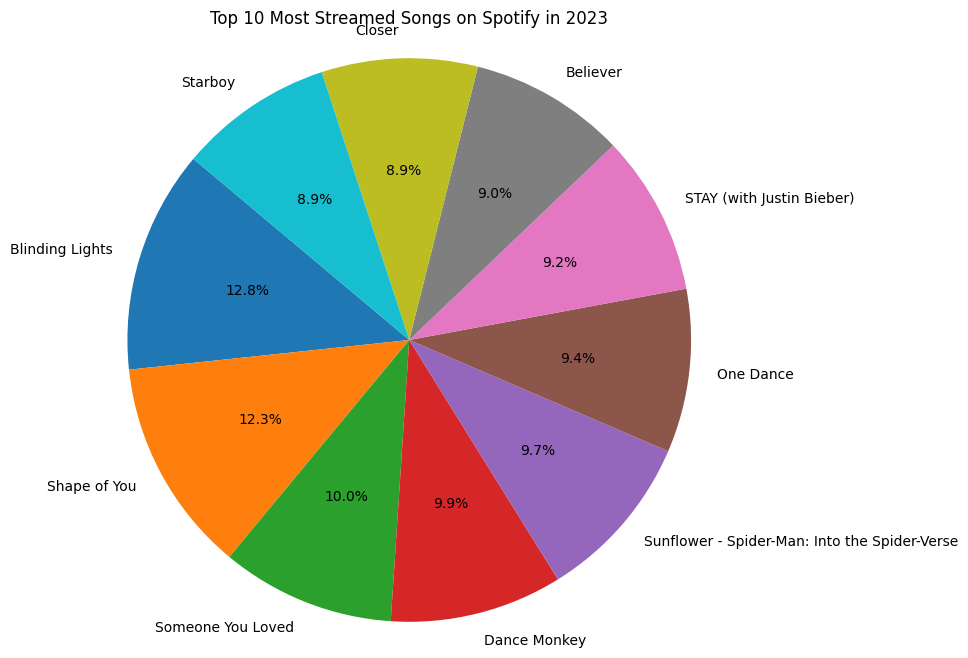

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_songs['streams'], labels=top_10_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Streamed Songs on Spotify in 2023')
plt.show()

2. Створіть кругову діаграму або секторну діаграму, яка відображає розподіл за danceability серед найпопулярніших пісень у 2023 році.

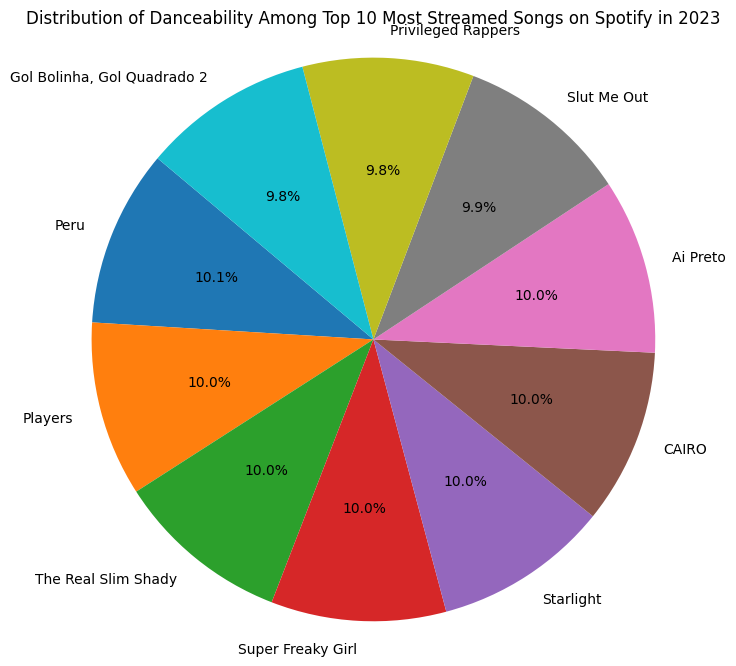

In [ ]:
top_10_songs = data.sort_values(by='danceability_%', ascending=False).head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_songs['danceability_%'], labels=top_10_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Danceability Among Top 10 Most Streamed Songs on Spotify in 2023')
plt.show()

3. Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

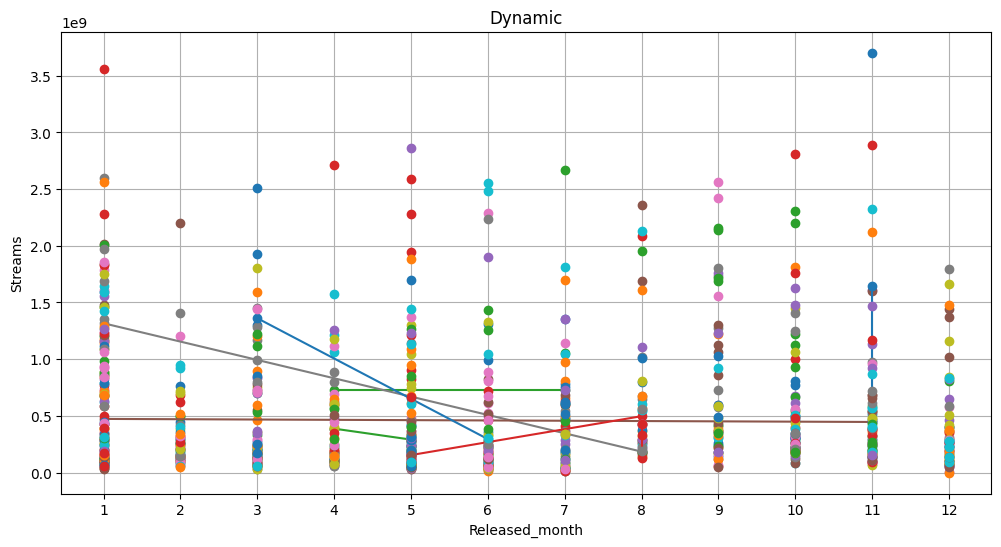

In [ ]:
#DONT WORKING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
track_name = top_10_songs.iloc[0]['track_name']
plt.figure(figsize=(12, 6))
for track_name, track_data in data.groupby('track_name'):
  plt.plot(
      track_data['released_month'],
      track_data['streams'],
      marker='o',
      linestyle='-',
      label=track_name
  )

plt.xlabel("Released_month")
plt.ylabel("Streams")
plt.title("Dynamic")
plt.xticks(data['released_month'].unique())
#plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize='small')
plt.grid(True)
plt.show()

4. Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

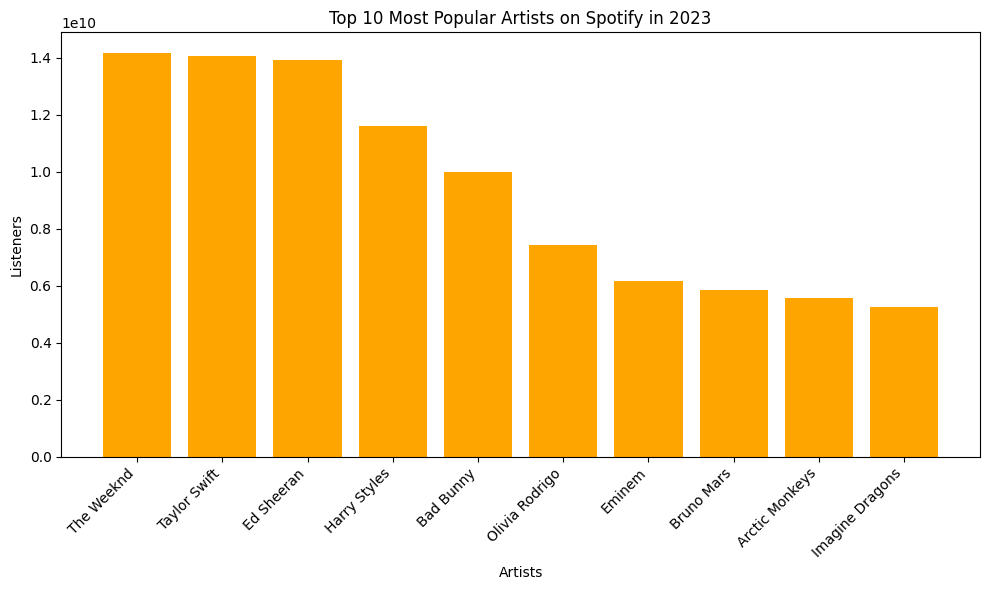

In [ ]:
top_10_artists = data.groupby('artist(s)_name').agg({'streams': 'sum'}).nlargest(10, 'streams')
plt.figure(figsize=(10, 6))
plt.bar(top_10_artists.index, top_10_artists['streams'], color='orange')
plt.xlabel('Artists')
plt.ylabel('Listeners')
plt.title('Top 10 Most Popular Artists on Spotify in 2023')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5. Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

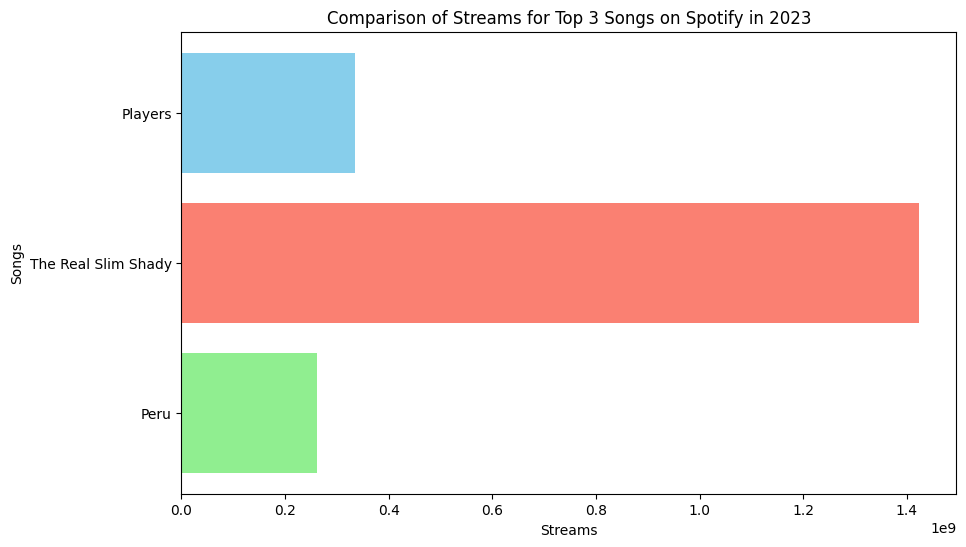

In [ ]:
top_3_songs_streams = data[data['track_name'].isin(top_10_songs.head(3)['track_name'])]
plt.figure(figsize=(10, 6))
plt.barh(top_3_songs_streams['track_name'], top_3_songs_streams['streams'], color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Streams')
plt.ylabel('Songs')
plt.title('Comparison of Streams for Top 3 Songs on Spotify in 2023')
plt.gca().invert_yaxis()
plt.show()